In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#Import Necessary libraries for Data analysis and visualizetion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Loading

In [3]:
#Creating a variable
Data=pd.read_csv("PS_20174392719_1491204439457_log.csv")
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Cleaning

In [4]:
Data.shape

(6362620, 11)

In [5]:
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
Data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

so given dataset contains no null and nan values

In [7]:
Data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [8]:
Data['step'].duplicated().value_counts()

step
True     6361877
False        743
Name: count, dtype: int64

In [9]:
Data.drop_duplicates()
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
Data.shape

(6362620, 11)

# Data Visualization

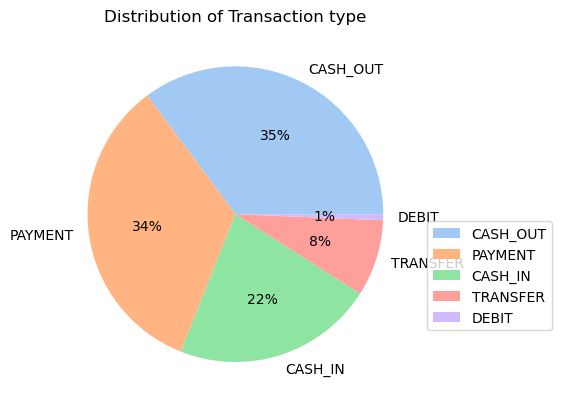

In [11]:
Type=Data['type'].value_counts()
data=Type.values
labels=Type.index
colors=sns.color_palette('pastel')[0:8]
plt.pie(data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title('Distribution of Transaction type')
plt.legend(labels,loc='best',bbox_to_anchor=(1,0.5))
plt.show()

In [12]:
# Select numeric columns
numeric_cols = Data.select_dtypes(include=[np.number]).columns

# Calculate correlation between 'isFraud' and other numeric columns
correlation = Data[numeric_cols].corr()
print(correlation['isFraud'].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


<Axes: >

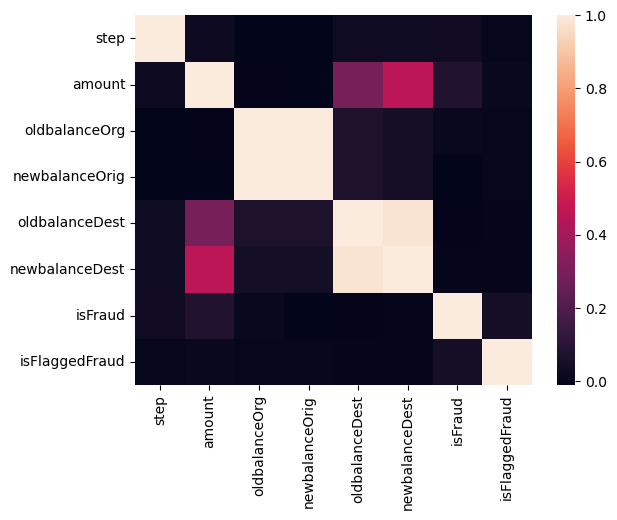

In [13]:
# Assuming Data is your DataFrame
numeric_cols = Data.select_dtypes(include=[np.number]).columns
corr_matrix = Data[numeric_cols].corr()

sns.heatmap(corr_matrix)

In [14]:
Data['type'].dtype

dtype('O')

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Data['type']=LE.fit_transform(Data['type'])
print(Data['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int32


In [16]:
print(Data['isFraud'])

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


Transform values of the isFraud column into fraud and non-fraud for better knowing

In [17]:
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Model Building

In [18]:
from sklearn.model_selection import train_test_split

x=np.array(Data[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(Data[['isFraud']])

Training the machine learning model

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Generating Perfect machine learning model

so the traing model is over this time for evaluate various classification models

Linear Regression

Logistic Regression

Decision tree classifier

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.13818548567262645

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
LO=LogisticRegression()
LO.fit(x_train,y_train)
LO.score(x_test,y_test)


C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9994766306961598

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT.score(x_test,y_test)

0.9997053100766665

# Model Evaluation

Checking accuracy of the model

In [23]:
Data['isFraud'].sum()/len(Data)

0.001290820448180152

So nearly 0.1% data observations are infact instances of fraud.This means the generated model still maintains 99.99 accuracy

# Cross Validation

Importing Libraries to perform cross validation

In [24]:
from sklearn.model_selection import cross_val_score

Decision Tree

In [25]:
DT_score=cross_val_score(DT,x_test,y_test)
np.mean(DT_score)

0.9994279086430374

Logical Regression

In [26]:
LO_score=cross_val_score(LO,x_test,y_test)
np.mean(LO_score)

C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

0.9994758445580884

In [27]:
LO.fit(x_train,y_train)

C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
#features=[type,amount,oldbalaceorg,newbalanceOrig]

features=np.array([[4,9000.80,9000.80,0.0]])
print(LO.predict(features))

[1]
